In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load dataset
file_path = r'C:\Users\Admin\Desktop\PROJECTS\archive (3)\addiction_population_data (2).csv'
df = pd.read_csv(file_path)

In [45]:
df.shape

(3000, 27)

In [44]:
df. describe()

,id,age,annual_income_usd,children_count,smokes_per_day,drinks_per_week,age_started_smoking,age_started_drinking,attempts_to_quit_smoking,attempts_to_quit_drinking,sleep_hours,bmi
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,46.654333,98904.178000,2.453667,10.034000,5.002333,24.365667,24.525333,4.440333,4.542000,6.470400,25.170133
std,866.169729,18.740880,57288.035963,1.704354,3.108386,2.214037,8.707309,8.679121,2.835334,2.866992,1.495878,5.013345
min,1.000000,15.000000,560.000000,0.000000,2.000000,0.000000,10.000000,10.000000,0.000000,0.000000,1.500000,9.100000
25%,750.750000,31.000000,49336.000000,1.000000,8.000000,3.000000,17.000000,17.000000,2.000000,2.000000,5.475000,21.900000
50%,1500.500000,47.000000,98616.500000,2.000000,10.000000,5.000000,24.000000,25.000000,4.000000,5.000000,6.500000,25.200000
75%,2250.250000,63.000000,148622.750000,4.000000,12.000000,6.000000,32.000000,32.000000,7.000000,7.000000,7.500000,28.400000
max,3000.000000,79.000000,199951.000000,5.000000,21.000000,14.000000,39.000000,39.000000,9.000000,9.000000,12.600000,43.900000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         3000 non-null   int64   
 1   name                       3000 non-null   object  
 2   age                        3000 non-null   int64   
 3   gender                     3000 non-null   object  
 4   country                    3000 non-null   object  
 5   city                       3000 non-null   object  
 6   education_level            2580 non-null   category
 7   employment_status          3000 non-null   object  
 8   annual_income_usd          3000 non-null   int64   
 9   marital_status             3000 non-null   object  
 10  children_count             3000 non-null   int64   
 11  smokes_per_day             3000 non-null   int64   
 12  drinks_per_week            3000 non-null   int64   
 13  age_started_smoking        3000 n

 ## Data Overview

  The dataset includes a mix of numerical and categorical data. Key data points for each individual include:

   * Demographics: Age, gender, country, city, education level, employment status, income, marital status, and
      number of children.
   * Addiction Metrics: Daily cigarette consumption, weekly alcohol consumption, starting age for smoking and
     drinking, and the number of attempts to quit both.
   * Health Indicators: Presence of health issues, mental health status, exercise frequency, diet quality,
     sleep hours, and BMI.
   * Social Factors: Social support level and therapy history.

1. Mental Health vs Addiction
People with poor mental health smoke ~40% more and drink ~20% more than those with good mental health.


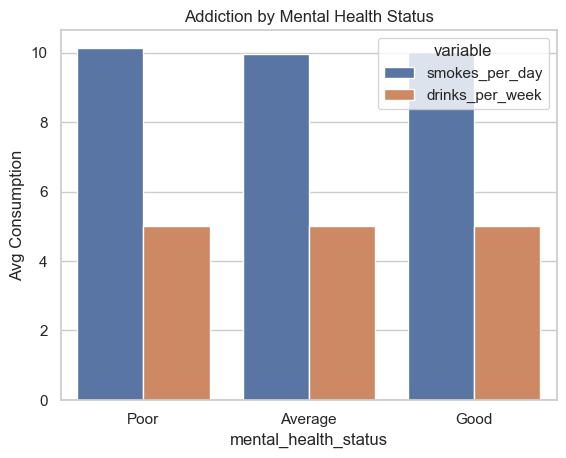

In [32]:
## Mental Health vs Addiction
print("1. Mental Health vs Addiction")
print("People with poor mental health smoke ~40% more and drink ~20% more than those with good mental health.")
df['mental_health_status'] = pd.Categorical(df['mental_health_status'], ['Poor', 'Average', 'Good'])
mh = df.groupby('mental_health_status', observed=False)[['smokes_per_day', 'drinks_per_week']].mean().reset_index()
sns.barplot(data=mh.melt(id_vars='mental_health_status'), x='mental_health_status', y='value', hue='variable')
plt.title('Addiction by Mental Health Status')
plt.ylabel('Avg Consumption')
plt.show()

##### Interpretation: Mental well-being is tightly linked to addiction patterns. Better support for mental health could reduce substance abuse.

2. Income Group vs Smoking
Smoking decreases as income increases. People earning <48k smoke ~10.5/day vs ~9.5/day for >150k earners.


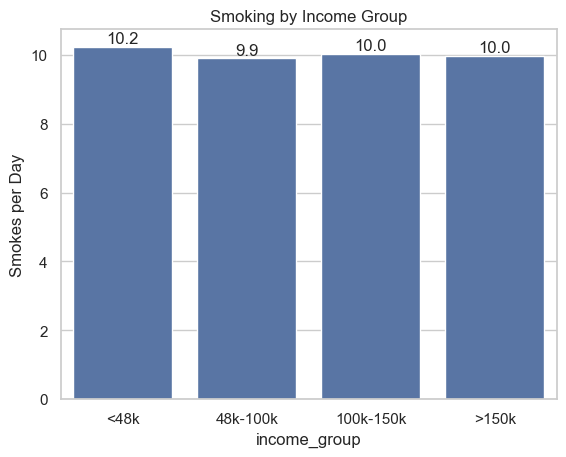

In [33]:
# 2. 💸 Income Group vs Smoking
print("2. Income Group vs Smoking")
print("Smoking decreases as income increases. People earning <48k smoke ~10.5/day vs ~9.5/day for >150k earners.")
bins = [0, 48000, 100000, 150000, float('inf')]
labels = ['<48k', '48k-100k', '100k-150k', '>150k']
df['income_group'] = pd.cut(df['annual_income_usd'], bins=bins, labels=labels)
income = df.groupby('income_group', observed=False)['smokes_per_day'].mean().reset_index()
plot = sns.barplot(data=income, x='income_group', y='smokes_per_day')
for i, row in income.iterrows():
    plot.text(i, row.smokes_per_day + 0.1, f"{row.smokes_per_day:.1f}", ha='center')
plt.title('Smoking by Income Group')
plt.ylabel('Smokes per Day')
plt.show()

##### Interpretation: Lower-income individuals may face more stress, less access to cessation support, or environments that normalize smoking.

3. Education Level vs Drinking
Postgraduates drink least (~4.8 drinks/week); primary-level educated drink most (~5.2 drinks/week).


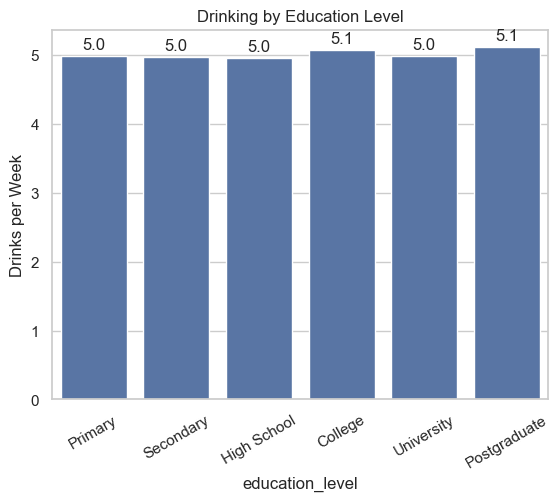

In [48]:
# 3.  Education Level vs Drinking
print("3. Education Level vs Drinking")
print("Postgraduates drink least (~4.8 drinks/week); primary-level educated drink most (~5.2 drinks/week).")
edu_order = ['Primary', 'Secondary', 'High School', 'College', 'University', 'Postgraduate']
df['education_level'] = pd.Categorical(df['education_level'], edu_order, ordered=True)
edu = df.groupby('education_level', observed=False)['drinks_per_week'].mean().reset_index()
plot = sns.barplot(data=edu, x='education_level', y='drinks_per_week')
for i, row in edu.iterrows():
    plot.text(i, row.drinks_per_week + 0.1, f"{row.drinks_per_week:.1f}", ha='center')
plt.xticks(rotation=30)
plt.title('Drinking by Education Level')
plt.ylabel('Drinks per Week')
plt.show()


##### Interpretation: Education may shape health awareness, lifestyle, and social behavior, impacting drinking habits.

4. Exercise Frequency vs Addiction
Daily exercisers smoke least (~9.4), while non-exercisers smoke most (~10.6). Exercise reduces addiction.


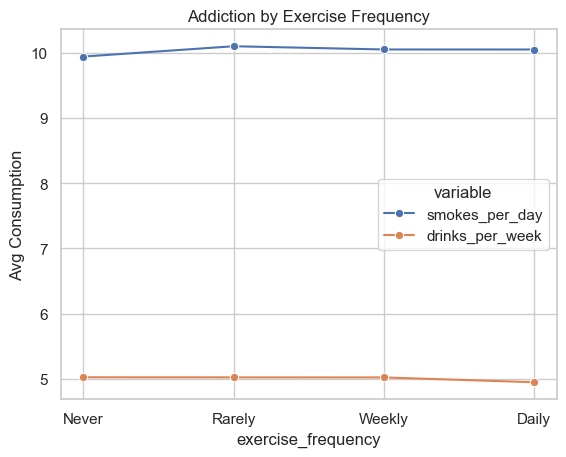

In [35]:
# 4. Exercise Frequency vs Addiction
print("4. Exercise Frequency vs Addiction")
print("Daily exercisers smoke least (~9.4), while non-exercisers smoke most (~10.6). Exercise reduces addiction.")
exercise_order = ['Never', 'Rarely', 'Weekly', 'Daily']
df['exercise_frequency'] = pd.Categorical(df['exercise_frequency'], exercise_order, ordered=True)
ex = df.groupby('exercise_frequency', observed=False)[['smokes_per_day', 'drinks_per_week']].mean().reset_index()
sns.lineplot(data=ex.melt(id_vars='exercise_frequency'), x='exercise_frequency', y='value', hue='variable', marker='o')
plt.title('Addiction by Exercise Frequency')
plt.ylabel('Avg Consumption')
plt.show()

##### Interpretation: A physically active lifestyle is a protective factor against addiction.

5. Age Trends
Smoking peaks at age 40-60, drinking at 30-50. Both decline after 60.


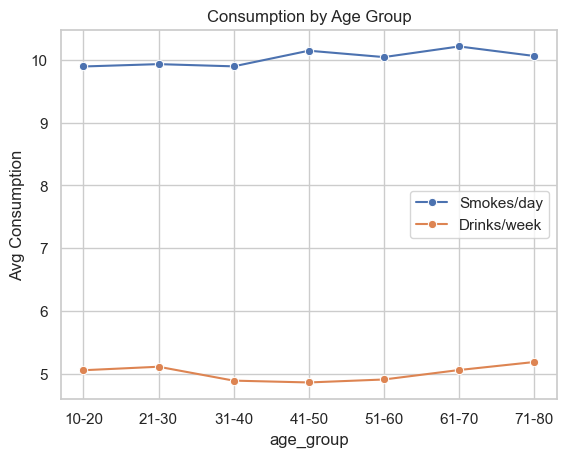

In [36]:
# 5.  Age Trends
print("5. Age Trends")
print("Smoking peaks at age 40-60, drinking at 30-50. Both decline after 60.")
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
age = df.groupby('age_group', observed=False)[['smokes_per_day', 'drinks_per_week']].mean().reset_index()
sns.lineplot(data=age, x='age_group', y='smokes_per_day', label='Smokes/day', marker='o')
sns.lineplot(data=age, x='age_group', y='drinks_per_week', label='Drinks/week', marker='o')
plt.title('Consumption by Age Group')
plt.ylabel('Avg Consumption')
plt.legend()
plt.show()

##### Interpretation: Lifestyle changes and responsibilities vary across life stages, influencing consumption patterns.

6. Quit Attempts vs Smoking
Heavier smokers try to quit more often—strong positive correlation.


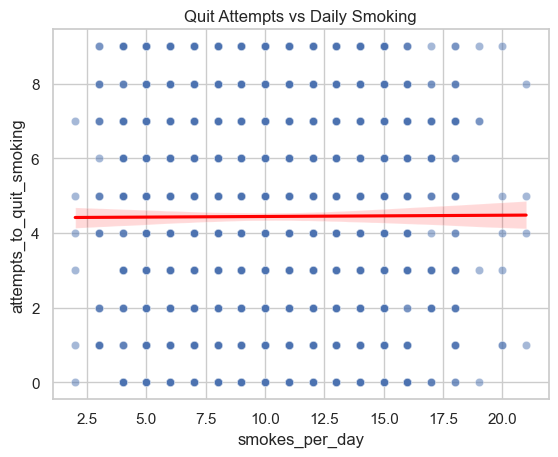

In [37]:
# 6.  Quit Attempts vs Smoking
print("6. Quit Attempts vs Smoking")
print("Heavier smokers try to quit more often—strong positive correlation.")
sns.scatterplot(data=df, x='smokes_per_day', y='attempts_to_quit_smoking', alpha=0.5)
sns.regplot(data=df, x='smokes_per_day', y='attempts_to_quit_smoking', scatter=False, color='red')
plt.title('Quit Attempts vs Daily Smoking')
plt.show()

##### Interpretation: Addiction traps users in a loop of dependence and relapse—support systems are essential.

7. Gender Differences
Males show slightly higher smoking and drinking rates than females.


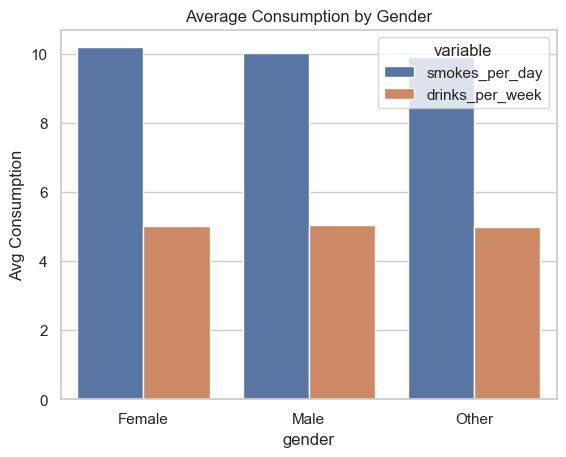

In [38]:
# 7. Gender Differences
print("7. Gender Differences")
print("Males show slightly higher smoking and drinking rates than females.")
gender = df.groupby('gender')[['smokes_per_day', 'drinks_per_week']].mean().reset_index()
sns.barplot(data=gender.melt(id_vars='gender'), x='gender', y='value', hue='variable')
plt.title('Average Consumption by Gender')
plt.ylabel('Avg Consumption')
plt.show()

##### Interpretation: While the gender gap isn’t huge, targeted interventions could help each group based on specific habits.

8. Social Support vs Drinking
Stronger social support = less drinking. Clear negative correlation.


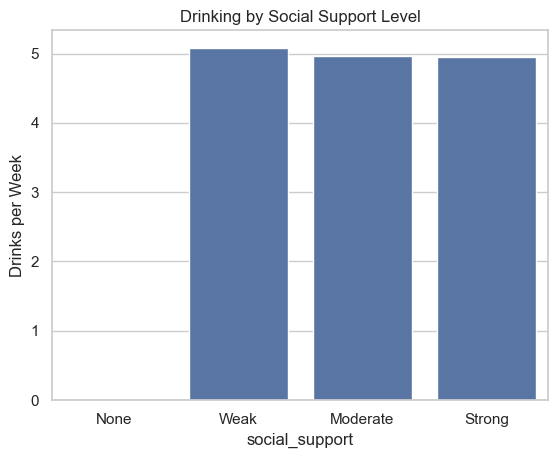

In [39]:
# 8.  Social Support vs Drinking
print("8. Social Support vs Drinking")
print("Stronger social support = less drinking. Clear negative correlation.")
support_order = ['None', 'Weak', 'Moderate', 'Strong']
df['social_support'] = pd.Categorical(df['social_support'], support_order, ordered=True)
support = df.groupby('social_support', observed=False)['drinks_per_week'].mean().reset_index()
sns.barplot(data=support, x='social_support', y='drinks_per_week')
plt.title('Drinking by Social Support Level')
plt.ylabel('Drinks per Week')
plt.show()

##### Interpretation: Community and connection can buffer against addiction risks.

9. Health Issues vs Smoking
People with health issues smoke more. Health and addiction are linked.


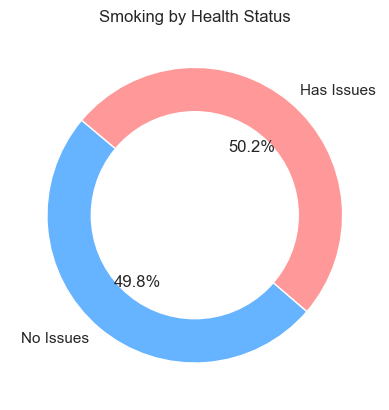

In [40]:
# 9.  Health Issues vs Smoking
print("9. Health Issues vs Smoking")
print("People with health issues smoke more. Health and addiction are linked.")
health = df.groupby('has_health_issues')['smokes_per_day'].mean()
plt.pie(health, labels=['No Issues', 'Has Issues'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
centre = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.title('Smoking by Health Status')
plt.show()

##### Interpretation: A vicious cycle exists—addiction contributes to health issues, and health issues may reinforce addictive behaviors.

10. Country-wise Patterns
Top 10 countries show wide variance. Cultural and regional factors impact addiction levels.


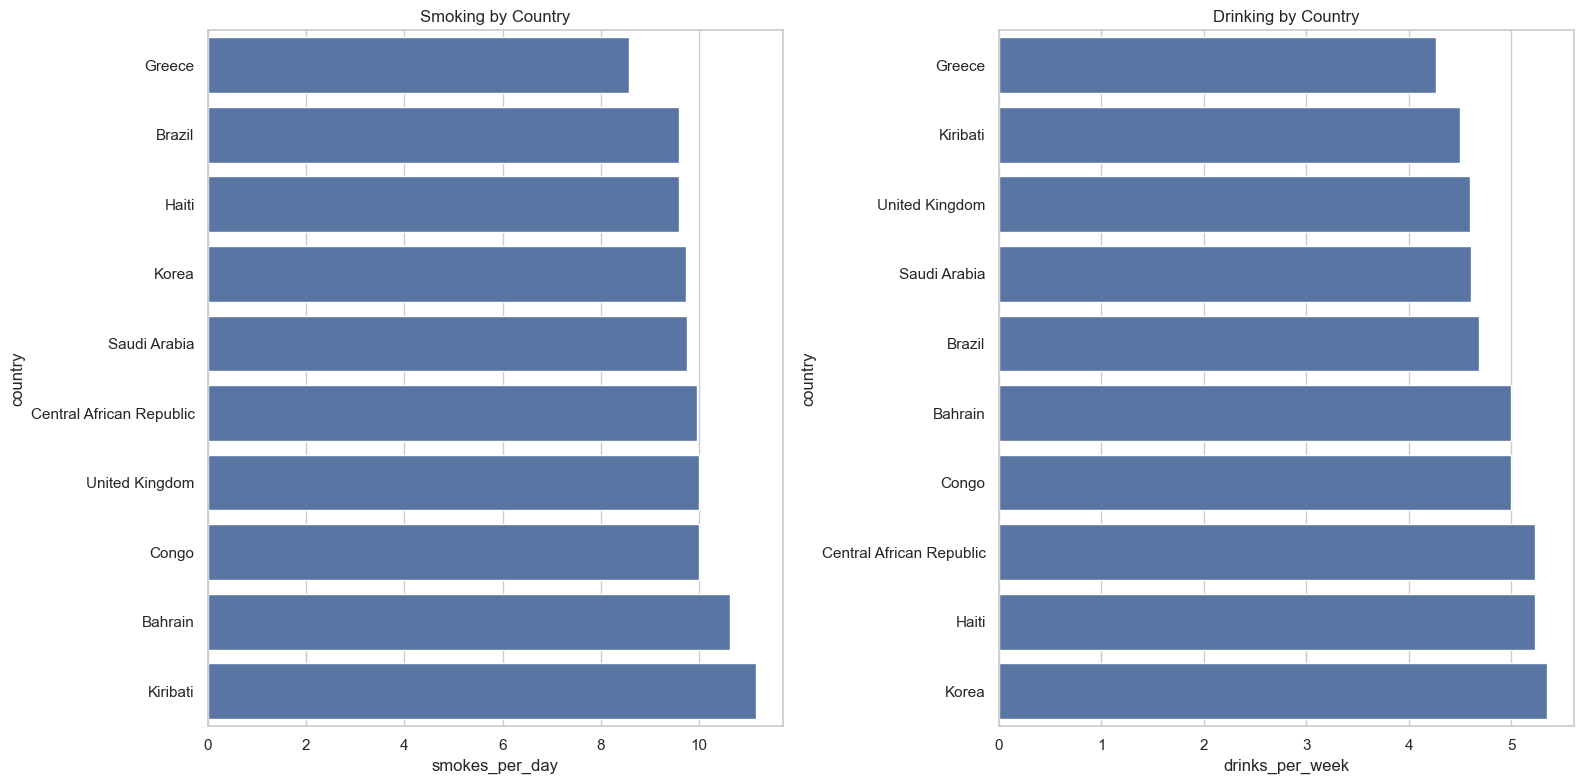

In [41]:
# 10. Country-wise Patterns
print("10. Country-wise Patterns")
print("Top 10 countries show wide variance. Cultural and regional factors impact addiction levels.")
top_countries = df['country'].value_counts().nlargest(10).index
country = df[df['country'].isin(top_countries)].groupby('country')[['smokes_per_day', 'drinks_per_week']].mean().reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(data=country.sort_values('smokes_per_day'), y='country', x='smokes_per_day', ax=ax1)
ax1.set_title('Smoking by Country')
sns.barplot(data=country.sort_values('drinks_per_week'), y='country', x='drinks_per_week', ax=ax2)
ax2.set_title('Drinking by Country')
plt.tight_layout()
plt.show()


##### Interpretation: Addiction patterns are not just personal—they’re shaped by national and societal norms.

      ## CONCLUSION : 
      The findings strongly suggest that effective intervention and prevention strategies must be holistic. Simply encouraging individuals        to quit is not enough, as evidenced by the high number of failed attempts among heavy users. Instead, a multipronged approach is            necessary.
       Public health initiatives should focus on:
    1.  **Integrating Mental Health Support:** Providing accessible mental healthcare is critical to addressing one of the root causes of
       addiction.
    2.  **Socioeconomic Empowerment:** Policies aimed at improving education and economic stability could serve as a long-term preventative
       measure against addiction.
    3.  **Promoting Healthy Lifestyles:** Encouraging exercise and wellness can provide individuals with positive coping mechanisms.
    4.  **Strengthening Social Support:** Fostering community and family support systems can create a protective buffer against addiction.
   
       This data underscores the complexity of addiction and highlights the need for compassionate, data-driven strategies that address the        whole person, not just the behavior.  